In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
classifier("this is such a great_movie!")

[{'label': 'POSITIVE', 'score': 0.9998257756233215}]

In [ ]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
classifier("this is show was not interesting")

[{'label': 'NEGATIVE', 'score': 0.9997839331626892}]

In [ ]:
classifier("this is show was not interesting")

[{'label': 'NEGATIVE', 'score': 0.9997839331626892}]

In [ ]:
classifier("this is show was interesting")

[{'label': 'POSITIVE', 'score': 0.9994580149650574}]

In [ ]:
classifier( ["This course is just what I need", "The weather is great today!", "I'm feeling so happy!", "This show was not interesting", "The food was terrible", "I'm feeling so sad"])

[{'label': 'POSITIVE', 'score': 0.999372661113739},
 {'label': 'POSITIVE', 'score': 0.9998798370361328},
 {'label': 'POSITIVE', 'score': 0.9998788833618164},
 {'label': 'NEGATIVE', 'score': 0.9997871518135071},
 {'label': 'NEGATIVE', 'score': 0.9991029500961304},
 {'label': 'NEGATIVE', 'score': 0.9993422627449036}]

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
 #torch.cuda.current_device()

In [ ]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df_ =pd.read_csv("/content/AirlineTweets.csv")

In [ ]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df=df_[['airline_sentiment', 'text']].copy()

<Axes: >

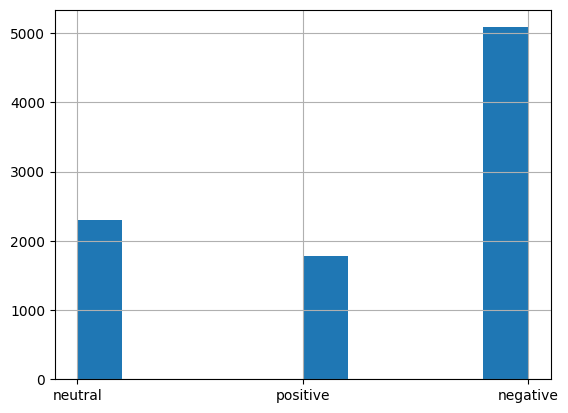

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
df=df[df.airline_sentiment !='neutral'].copy()

In [ ]:
target_map={'positive':1, 'negative':0}
df['target']= df['airline_sentiment'].map(target_map)

In [ ]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
len(df)

6860

In [ ]:
texts = df['text'].tolist()
predictions = classifier(texts)

In [ ]:
predictions

[{'label': 'POSITIVE', 'score': 0.6070870161056519},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553211331367493},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [ ]:
probs = [d['score'] if d['label'].startswith('p') else 1 - d['score'] \
         for d in predictions]
probs

[0.39291298389434814,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574825763702393,
 0.04467886686325073,
 0.01729118824005127,
 0.0005148649215698242,
 0.0006490349769592285,
 0.005917847156524658,
 0.013686656951904297,
 0.0003695487976074219,
 0.001948714256286621,
 0.0035563111305236816,
 0.0031333565711975098,
 0.021235227584838867,
 0.0004781484603881836,
 0.004548370838165283,
 0.0004375576972961426,
 0.0001251697540283203,
 0.004880666732788086,
 0.0004048943519592285,
 0.0006322264671325684,
 0.01542806625366211,
 0.01828092336654663,
 0.0004482865333557129,
 0.0023748278617858887,
 0.006551921367645264,
 0.0023932456970214844,
 0.13382643461227417,
 0.0003237724304199219,
 0.15843981504440308,
 0.0032317638397216797,
 0.00021535158157348633,
 0.1761462688446045,
 0.0006104707717895508,
 0.09156584739685059,
 0.004861712455749512,
 0.00021797418594360352,
 0.0014235973358154297,
 0.004673957824707031,
 0.00464242696762085,
 0.019041001796722412,
 0.00883030891418457,


In [ ]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

preds = np.array(preds)


In [ ]:
print("acc:", np.mean(df['target'==preds]))

acc: airline_sentiment    NaN
text                 NaN
target               NaN
dtype: object


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
cm = confusion_matrix(df['target'],preds ,normalize= 'true')
cm

array([[0.89437451, 0.10562549],
       [0.15653153, 0.84346847]])

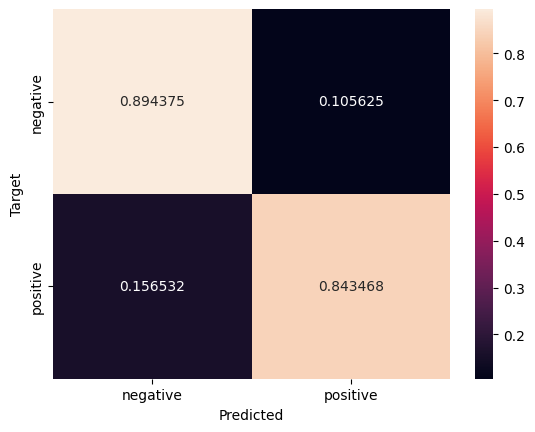

In [ ]:
def plot_cm(cm):
  classes =['negative', 'positive']
  df_cm =pd.DataFrame(cm, index=classes, columns=classes)
  ax=sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
plot_cm(cm)

In [ ]:
f1_score(df['target'],preds)

0.7861453686696405

In [ ]:
f1_score(1-df['target'],1-preds)

0.9177515390049451